In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

In [74]:
# Trocar \ por /
# Encontrar onde está o .csv
df=pd.read_csv(r'C:/Users/sicilia.giacomazza/Downloads/train.csv')

In [75]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [76]:
# Três ultimas linhas dos dados
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [77]:
df.shape

(891, 12)

In [78]:
# Estatística Descritiva dos Dados

In [79]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [80]:
# Avaliar quantos valores faltantes existem

In [81]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
# Preenchendo os valores faltantes com a média
df.fillna(df['Age'].dropna().median(), inplace = True)

In [83]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

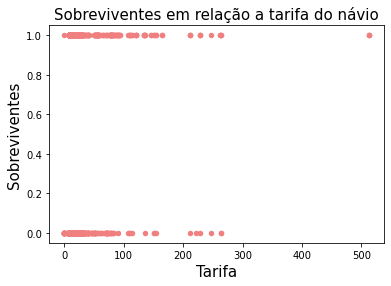

In [84]:
# Plotando Sobreviventes
df.plot(kind = 'scatter', x = 'Fare', y = 'Survived', color = 'lightcoral', linewidth = 1)
plt.xlabel('Tarifa', size = 15)
plt.ylabel('Sobreviventes', size = 15)
plt.title('Sobreviventes em relação a tarifa do návio', size = 15)
plt.show()
# tarifa + cara + sobreviventes

In [85]:
# Sobreviventes em relação a classe do návio

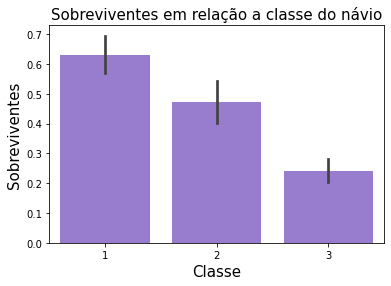

In [86]:
sns.barplot(x = 'Pclass', y = 'Survived', data = df, color = 'mediumpurple')
plt.xlabel('Classe', size = 15)
plt.ylabel('Sobreviventes', size = 15)
plt.title('Sobreviventes em relação a classe do návio', size = 15)
plt.show()
# Tarifas + Caras + Sobreviventes

In [87]:
# Sobreviventes em relação ao sexo

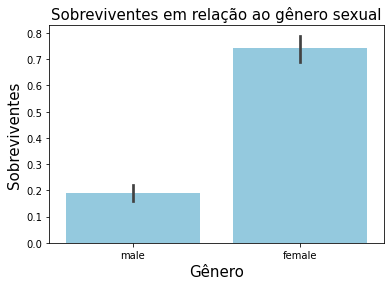

In [88]:
sns.barplot(x = 'Sex', y = 'Survived', data = df, color = 'skyblue')
plt.xlabel('Gênero', size = 15)
plt.ylabel('Sobreviventes', size = 15)
plt.title('Sobreviventes em relação ao gênero sexual', size = 15)
plt.show()
# Mulheres sobreviveram mais

In [89]:
# Informações de Idade e Sexo

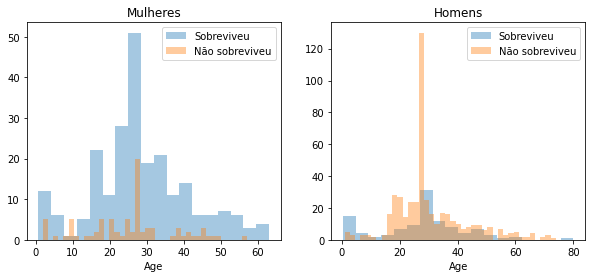

In [94]:
survived = 'Sobreviveu'
not_survived = 'Não sobreviveu'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()

ax.set_title('Mulheres')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()

_ = ax.set_title('Homens')